In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image
import json

In [3]:
img_num = 0
image_filenames = ['image_20250707_114020_198180_cam0.png',  'image_20250707_114257_909270_cam0.png',  'image_20250707_114533_640417_cam0.png', 'image_20250707_114132_356887_cam0.png',  'image_20250707_114429_629981_cam0.png']
image_filepath = Path('/', 'mnt', 'data', 'data', image_filenames[img_num])
ROI_manifest = Path('/', 'home', 'phorest', 'Documents', 'Python', 'phorest_pipeline', 'generated_files', 'ROI_manifest.json')

In [4]:
roi_data = ROI_manifest.read_text(encoding="utf-8")
roi_data = json.loads(roi_data)
rois = list(roi_data.keys())
print(len(rois))

21


In [5]:
img = Image.open(image_filepath)
img_np = np.array(img)
print(img.size)
print(img_np.shape)

(9152, 6944)
(6944, 9152)


slice(7377, 7731, None)
slice(348, 493, None)
(145, 354)


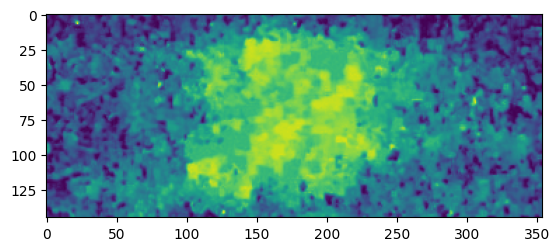

In [6]:
roi_num = 9
offset = -10

roi_x_slice = slice(roi_data[rois[roi_num]]['coords'][1], roi_data[rois[roi_num]]['coords'][1]+roi_data[rois[roi_num]]['size'][1])
roi_y_slice = slice(roi_data[rois[roi_num]]['coords'][0] + offset, roi_data[rois[roi_num]]['coords'][0] + offset + roi_data[rois[roi_num]]['size'][0])
print(roi_x_slice)
print(roi_y_slice)
roi_img = img_np[roi_y_slice, roi_x_slice]
print(roi_img.shape)
plt.imshow(roi_img)

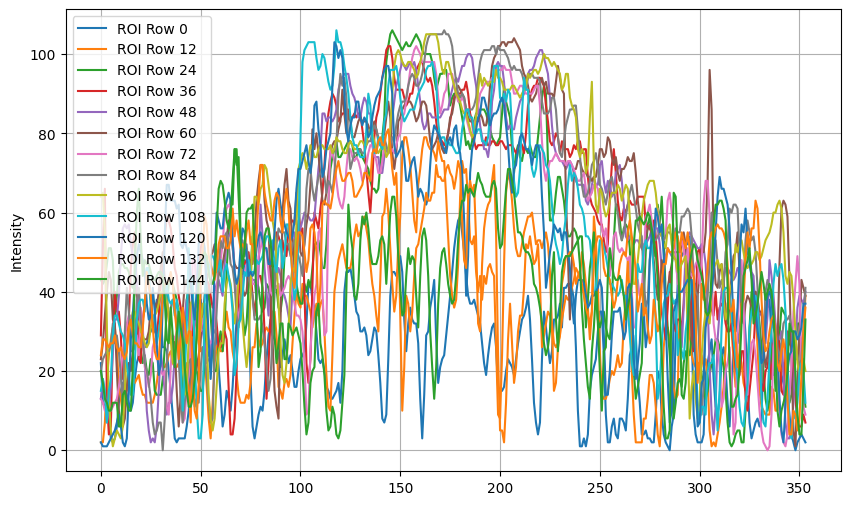

Max/Min of row 0: 59/0


In [9]:
num_rows, num_cols = roi_img.shape
    

plt.figure(figsize=(10, 6))

for row_index in range(0, num_rows, 12):
    row_intensities = roi_img[row_index, :]
    plt.plot(row_intensities, label=f'ROI Row {row_index}')

plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()
print(f"Max/Min of row 0: {np.amax(roi_img[0, :])}/{np.amin(roi_img[0, :])}")